# **Stock market news feed semantic analysis** *(Baseline Tweets)*

In [ ]:
# connect drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install torchtext==0.6.0

In [ ]:
pip install spacy==3.0

In [ ]:
# basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from wordcloud import WordCloud
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize  
from sklearn.utils import shuffle

# import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.pipeline import Pipeline

# LSTM
import torch.optim as optim
import torch.nn as nn
import torch
from torchtext import data
import sklearn.metrics as metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# vader import

In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# set seeds for reproducability
# Max iteration for training
MAX_ITER = 1000

# Train size
TRAIN_SPLIT = 0.75

# Test size
TEST_SPLIT = 0.25

# Only validation split
VALIDATION_SPLIT = 0.1

# Shuffle cycle number for the dataframe
SHUFFLE_CYCLE = 500

# Random seed
RANDOM_SEED = 1234

# Numpy random seed
NP_SEED = 1234
np.random.seed(NP_SEED)

In [ ]:
# load dataset to local host
!cp "/content/drive/MyDrive/Kaggle dataset/Tweets about the Top Componies from 2015 to 2020/KAG_TWEETS_DF_1.csv"  "KAG_TWEETS_DF_1.csv"
!cp "/content/drive/MyDrive/Kaggle dataset/Tweets about the Top Componies from 2015 to 2020/KAG_TWEETS_DF_2.csv"  "KAG_TWEETS_DF_2.csv"
!cp "/content/drive/MyDrive/Kaggle dataset/Tweets about the Top Componies from 2015 to 2020/KAG_TWEETS_DF_3.csv"  "KAG_TWEETS_DF_3.csv"
!cp "/content/drive/MyDrive/Kaggle dataset/Tweets about the Top Componies from 2015 to 2020/KAG_TWEETS_DF_4.csv"  "KAG_TWEETS_DF_4.csv"
!cp "/content/drive/MyDrive/Kaggle dataset/Tweets about the Top Componies from 2015 to 2020/KAG_TWEETS_DF_5.csv"  "KAG_TWEETS_DF_5.csv"
!cp "/content/drive/MyDrive/Kaggle dataset/Tweets about the Top Componies from 2015 to 2020/KAG_TWEETS_DF_6.csv"  "KAG_TWEETS_DF_6.csv"
!cp "/content/drive/MyDrive/Kaggle dataset/Tweets about the Top Componies from 2015 to 2020/KAG_TWEETS_DF_7.csv"  "KAG_TWEETS_DF_7.csv"
!cp "/content/drive/MyDrive/Kaggle dataset/Tweets about the Top Componies from 2015 to 2020/KAG_TWEETS_DF_8.csv"  "KAG_TWEETS_DF_8.csv"
!cp "/content/drive/MyDrive/Kaggle dataset/Tweets about the Top Componies from 2015 to 2020/KAG_TWEETS_DF_9.csv"  "KAG_TWEETS_DF_9.csv"
!cp "/content/drive/MyDrive/Kaggle dataset/Tweets about the Top Componies from 2015 to 2020/KAG_TWEETS_DF_10.csv" "KAG_TWEETS_DF_10.csv"

# load them into datasets
df_tweets_1 = pd.read_csv('KAG_TWEETS_DF_1.csv')
df_tweets_2 = pd.read_csv('KAG_TWEETS_DF_2.csv')
df_tweets_3 = pd.read_csv('KAG_TWEETS_DF_3.csv')
df_tweets_4 = pd.read_csv('KAG_TWEETS_DF_4.csv')
df_tweets_5 = pd.read_csv('KAG_TWEETS_DF_5.csv')
df_tweets_6 = pd.read_csv('KAG_TWEETS_DF_6.csv')
df_tweets_7 = pd.read_csv('KAG_TWEETS_DF_7.csv')
df_tweets_8 = pd.read_csv('KAG_TWEETS_DF_8.csv')
df_tweets_9 = pd.read_csv('KAG_TWEETS_DF_9.csv')
df_tweets_10 = pd.read_csv('KAG_TWEETS_DF_10.csv')

# merge them into one
df_tweets = pd.concat([df_tweets_1, df_tweets_2, df_tweets_3, df_tweets_4,
                       df_tweets_5, df_tweets_6, df_tweets_7, df_tweets_8,
                       df_tweets_9, df_tweets_10])

# show it
df_tweets.head(5)

,body,comment_num,retweet_num,like_num,ticker_symbol,date
0,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01
1,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01
3,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01
4,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01


In [ ]:
# show it
df_tweets.tail(5)

,body,comment_num,retweet_num,like_num,ticker_symbol,date
433640,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,2019-12-31
433641,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,2019-12-31
433642,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,2019-12-31
433643,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,2019-12-31
433644,"$AAPL #patent 10,522,475 Vertical interconnect...",0,0,0,AAPL,2019-12-31


In [ ]:
len(df_tweets)

4336445

In [ ]:
df_group = df_tweets.groupby(by="ticker_symbol")

In [ ]:
# only AAPL, AMZN, GOOG, GOOGL, MSFT, TSLA
df_group.describe()

comment_num                           ... like_num                 
                    count      mean       std  min  ...      25%  50%  75%    max
ticker_symbol                                       ...                          
AAPL            1425013.0  0.155822  1.168103  0.0  ...      0.0  0.0  1.0  924.0
AMZN             718715.0  0.211767  1.469905  0.0  ...      0.0  0.0  1.0  927.0
GOOG             392569.0  0.078213  0.646551  0.0  ...      0.0  0.0  0.0  903.0
GOOGL            327569.0  0.178952  1.283439  0.0  ...      0.0  0.0  1.0  793.0
MSFT             375711.0  0.110545  0.799367  0.0  ...      0.0  0.0  0.0  896.0
TSLA            1096868.0  0.695446  3.128582  0.0  ...      0.0  1.0  3.0  999.0

[6 rows x 24 columns]

In [ ]:
# filter and create new datasets
# The stock tickers which is needed
stock_ticker = ["AAPL", "AMZN", "GOOG", "GOOGL", "MSFT", "TSLA"]

df_tweet_aapl = pd.DataFrame()
df_tweet_amzn = pd.DataFrame()
df_tweet_goog = pd.DataFrame()
df_tweet_googl = pd.DataFrame()
df_tweet_msft = pd.DataFrame()
df_tweet_tsla = pd.DataFrame()

df_tweets_all = [df_tweet_aapl, df_tweet_amzn, df_tweet_goog,
                 df_tweet_googl, df_tweet_msft, df_tweet_tsla]

for stock in range(len(stock_ticker)):
        df_tweets_all[stock] = df_tweets[df_tweets.ticker_symbol.eq(stock_ticker[stock])]

df_tweet_aapl = df_tweets_all[0]
df_tweet_amzn = df_tweets_all[1]
df_tweet_goog = df_tweets_all[2]
df_tweet_googl = df_tweets_all[3]
df_tweet_msft = df_tweets_all[4]
df_tweet_tsla = df_tweets_all[5]

df_tweet_aapl.reset_index(inplace=True)
df_tweet_aapl.drop(["index", "ticker_symbol"], axis=1, inplace=True)

df_tweet_amzn.reset_index(inplace=True)
df_tweet_amzn.drop(["index", "ticker_symbol"], axis=1, inplace=True)

df_tweet_goog.reset_index(inplace=True)
df_tweet_goog.drop(["index", "ticker_symbol"], axis=1, inplace=True)

df_tweet_googl.reset_index(inplace=True)
df_tweet_googl.drop(["index", "ticker_symbol"], axis=1, inplace=True)

df_tweet_msft.reset_index(inplace=True)
df_tweet_msft.drop(["index", "ticker_symbol"], axis=1, inplace=True)

df_tweet_tsla.reset_index(inplace=True)
df_tweet_tsla.drop(["index", "ticker_symbol"], axis=1, inplace=True)

df_tweets_all = [df_tweet_aapl, df_tweet_amzn, df_tweet_goog,
                 df_tweet_googl, df_tweet_msft, df_tweet_tsla]

# save out to drive for future
df_tweet_aapl.to_csv('drive/MyDrive/df_tweet_aapl.tsv', sep = '\t', index=False)
df_tweet_amzn.to_csv('drive/MyDrive/df_tweet_amzn.tsv', sep = '\t', index=False)
df_tweet_goog.to_csv('drive/MyDrive/df_tweet_goog.tsv', sep = '\t', index=False)
df_tweet_googl.to_csv('drive/MyDrive/df_tweet_googl.tsv', sep = '\t', index=False)
df_tweet_msft.to_csv('drive/MyDrive/df_tweet_msft.tsv', sep = '\t', index=False)
df_tweet_tsla.to_csv('drive/MyDrive/df_tweet_tsla.tsv', sep = '\t', index=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# check the lengths
print("aapl")
print(len(df_tweet_aapl))
print("\namzn")
print(len(df_tweet_amzn))
print("\ngoog")
print(len(df_tweet_goog))
print("\ngoogl")
print(len(df_tweet_googl))
print("\nmsft")
print(len(df_tweet_msft))
print("\ntsla")
print(len(df_tweet_tsla))

aapl
1425013

amzn
718715

goog
392569

googl
327569

msft
375711

tsla
1096868


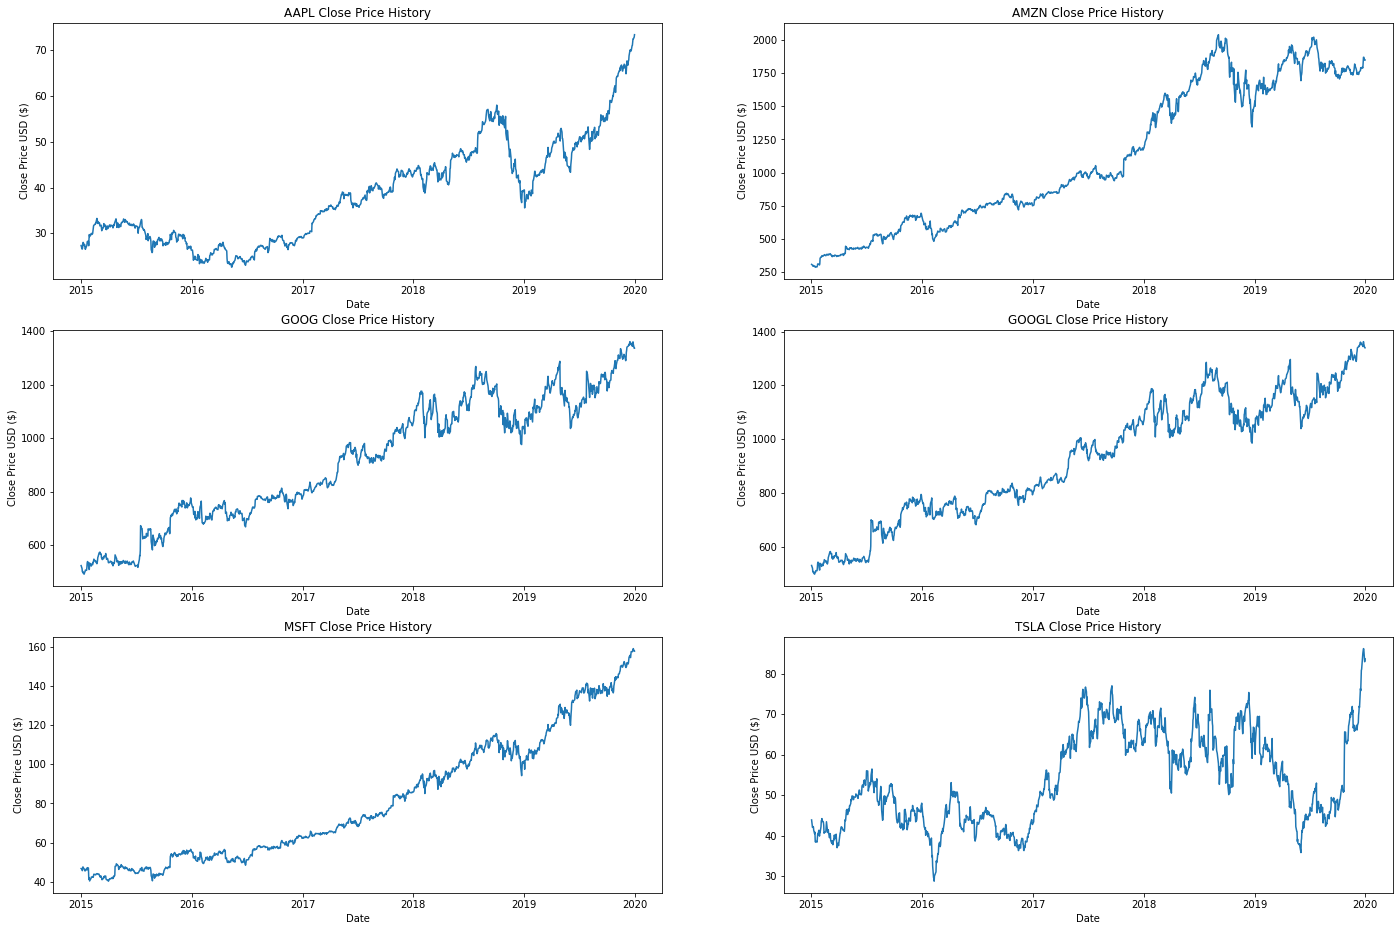

In [ ]:
# Load the stock data for all
df_stock_aapl = web.DataReader("AAPL", data_source="yahoo", start="2015-01-01", 
                          end="2019-12-31")
df_stock_amzn = web.DataReader("AMZN", data_source="yahoo", start="2015-01-01", 
                          end="2019-12-31")
df_stock_goog = web.DataReader("GOOG", data_source="yahoo", start="2015-01-01", 
                          end="2019-12-31")
df_stock_googl = web.DataReader("GOOGL", data_source="yahoo", start="2015-01-01", 
                          end="2019-12-31")
df_stock_msft = web.DataReader("msft", data_source="yahoo", start="2015-01-01", 
                          end="2019-12-31")
df_stock_tsla = web.DataReader("TSLA", data_source="yahoo", start="2015-01-01", 
                          end="2019-12-31")

df_stock_all = [df_stock_aapl, df_stock_amzn, df_stock_goog,
                df_stock_googl, df_stock_msft, df_stock_tsla]

# Visualize the closing price history
# Create six subplots and unpack the output array immediately
f, axs = plt.subplots(3, 2)

axs[0, 0].plot(df_stock_aapl["Close"])
axs[0, 0].set_title("AAPL Close Price History")
axs[0, 0].set_xlabel("Date")
axs[0, 0].set_ylabel("Close Price USD ($)")

axs[0, 1].plot(df_stock_amzn["Close"])
axs[0, 1].set_title("AMZN Close Price History")
axs[0, 1].set_xlabel("Date")
axs[0, 1].set_ylabel("Close Price USD ($)")

axs[1, 0].plot(df_stock_goog["Close"])
axs[1, 0].set_title("GOOG Close Price History")
axs[1, 0].set_xlabel("Date")
axs[1, 0].set_ylabel("Close Price USD ($)")

axs[1, 1].plot(df_stock_googl["Close"])
axs[1, 1].set_title("GOOGL Close Price History")
axs[1, 1].set_xlabel("Date")
axs[1, 1].set_ylabel("Close Price USD ($)")

axs[2, 0].plot(df_stock_msft["Close"])
axs[2, 0].set_title("MSFT Close Price History")
axs[2, 0].set_xlabel("Date")
axs[2, 0].set_ylabel("Close Price USD ($)")

axs[2, 1].plot(df_stock_tsla["Close"])
axs[2, 1].set_title("TSLA Close Price History")
axs[2, 1].set_xlabel("Date")
axs[2, 1].set_ylabel("Close Price USD ($)")

f.set_size_inches(24,16) # 8,8
plt.show()

In [ ]:
# world cloud
# Get all the words
for df, stock in zip(df_tweets_all, stock_ticker):
    print(stock)
    text_all = " ".join(news for news in df.body)
    print ("There are {} words in the combination of all tweets.".format(len(text_all)))

    # commented out for faster run
    # Generate a word cloud image
    #wordcloud = WordCloud(width=1600, height=800, background_color = "white").generate(text_all)

    # Display the generated image
    #plt.figure(figsize=(16,8))
    #plt.imshow(wordcloud, interpolation = "bilinear")
    #plt.axis("off")
    #plt.show()
    #print()

AAPL
There are 180135646 words in the combination of all tweets.
AMZN
There are 95852161 words in the combination of all tweets.
GOOG
There are 50526961 words in the combination of all tweets.
GOOGL
There are 42663284 words in the combination of all tweets.
MSFT
There are 52490565 words in the combination of all tweets.
TSLA
There are 151218420 words in the combination of all tweets.


In [ ]:
# create labels for dates
df_tweet_sorted_all = []
for df_tweet, df_stock in zip(df_tweets_all, df_stock_all):
    # change timestamp index to string
    days = []
    for row in range(len(df_stock)):
        days.append(str(df_stock.index[row])[0:10])

    df_stock.index = days

    dates = df_tweet.date.unique()
    print(len(dates))

    # Remove not relevant date
    good_dates = []
    for day in dates:
        exists = day in df_stock.index
        if exists is True:
            good_dates.append(day)

    df_tweet_sorted = df_tweet[df_tweet["date"].isin(good_dates)]
    df_tweet_sorted.reset_index(inplace=True, drop=True)

    dates = df_tweet_sorted.date.unique()
    print(len(dates))

    label = []

    # 1 -> rise, otherwise -> 0
    for day in range(len(dates)):
        if dates[day] == "2015-01-01":
            pass
        elif int(df_stock["Adj Close"][dates[day]]) >= int(df_stock["Adj Close"][dates[day - 1]]):
            label.append(1)
        else:
            label.append(0)

    dates = dates.tolist()

    label_scale = []
    for day in range(len(df_tweet_sorted)):
        label_scale.append(label[dates.index(df_tweet_sorted["date"][day])])

    df_tweet_sorted["label"] = label_scale
    df_tweet_sorted_all.append(df_tweet_sorted)

1819
1255


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


1826
1258
1825
1257
1826
1258
1826
1258
1826
1258


In [ ]:
df_tweet_sorted_all[0].groupby(by="label").describe()

comment_num                                ... like_num                      
            count      mean       std  min  25%  ...      min  25%  50%  75%    max
label                                            ...                               
0        223772.0  0.210174  1.297773  0.0  0.0  ...      0.0  0.0  0.0  1.0  818.0
1       1007324.0  0.148849  1.079483  0.0  0.0  ...      0.0  0.0  0.0  1.0  924.0

[2 rows x 24 columns]

In [ ]:
df_tweet_sorted_all[1].groupby(by="label").describe()

comment_num                                ... like_num                      
            count      mean       std  min  25%  ...      min  25%  50%  75%    max
label                                            ...                               
0        267163.0  0.211380  1.272738  0.0  0.0  ...      0.0  0.0  0.0  1.0  783.0
1        354393.0  0.215371  1.564156  0.0  0.0  ...      0.0  0.0  0.0  1.0  927.0

[2 rows x 24 columns]

In [ ]:
df_tweet_sorted_all[2].groupby(by="label").describe()

comment_num                                ... like_num                      
            count      mean       std  min  25%  ...      min  25%  50%  75%    max
label                                            ...                               
0        146288.0  0.079713  0.584640  0.0  0.0  ...      0.0  0.0  0.0  0.0  826.0
1        185391.0  0.080015  0.701532  0.0  0.0  ...      0.0  0.0  0.0  0.0  563.0

[2 rows x 24 columns]

In [ ]:
df_tweet_sorted_all[3].groupby(by="label").describe()

comment_num                                ... like_num                      
            count      mean       std  min  25%  ...      min  25%  50%  75%    max
label                                            ...                               
0        117585.0  0.177693  0.897854  0.0  0.0  ...      0.0  0.0  0.0  1.0  783.0
1        158552.0  0.190064  1.478779  0.0  0.0  ...      0.0  0.0  0.0  1.0  793.0

[2 rows x 24 columns]

In [ ]:
df_tweet_sorted_all[4].groupby(by="label").describe()

comment_num                                ... like_num                      
            count      mean       std  min  25%  ...      min  25%  50%  75%    max
label                                            ...                               
0         69476.0  0.130203  0.956681  0.0  0.0  ...      0.0  0.0  0.0  1.0  896.0
1        252154.0  0.103104  0.713002  0.0  0.0  ...      0.0  0.0  0.0  0.0  872.0

[2 rows x 24 columns]

In [ ]:
df_tweet_sorted_all[5].groupby(by="label").describe()

comment_num                                ... like_num                      
            count      mean       std  min  25%  ...      min  25%  50%  75%    max
label                                            ...                               
0        327849.0  0.703037  3.431754  0.0  0.0  ...      0.0  0.0  1.0  3.0  999.0
1        595439.0  0.655706  2.925271  0.0  0.0  ...      0.0  0.0  1.0  3.0  987.0

[2 rows x 24 columns]

In [ ]:
# VADER analysis -> commented out, saved the result
# The stock tickers which is needed
# stock_ticker = ["AAPL", "AMZN", "GOOG", "GOOGL", "MSFT", "TSLA"]

# result array
# acc_w_neut = []
# acc_wo_neut = []
# df_tweet_vader_all = []

# for stock, df in zip(stock_ticker, df_tweet_sorted_all):
#     print("Start of the " + str(stock))

#     # check the tweet vader sentiment and label correlation
#     train_X_raw = df["body"]
#     train_Y = df["label"]

#     analyzer = SentimentIntensityAnalyzer()

#     sentiment_raw = []
#     sentiment_polarity = []

#     print("length is " + str(len(df)))

#     # vader sentiment raw and polarity
#     for tweet, index in zip(train_X_raw, range(len(train_X_raw))):
#         vs = analyzer.polarity_scores(tweet)
#         sentiment_raw.append(vs.get("compound"))

#         if float(vs.get("compound")) >= 0.05:
#             sentiment_polarity.append("1")
#         elif float(vs.get("compound")) <= -0.05:
#             sentiment_polarity.append("0")
#         else:
#             sentiment_polarity.append("-")
        
#         if index % 100000 == 0:
#             print(str(index) + " is done")

#     df_tweet_vader = pd.DataFrame(data=train_X_raw)
#     df_tweet_vader["raw"] = sentiment_raw
#     df_tweet_vader["sentiment_polarity"] = sentiment_polarity
#     df_tweet_vader["label"] = train_Y

#     # get vader accuraccy
#     match = []
#     good = 0
#     bad = 0
#     neut = 0

#     for row in range(len(df_tweet_vader)):
#         if str(df_tweet_vader["label"][row]) == str(df_tweet_vader["sentiment_polarity"][row]):
#             match.append("1")
#             good += 1
#         elif str(df_tweet_vader["sentiment_polarity"][row]) == "-":
#             match.append("0")
#             neut += 1
#         else:
#             match.append("0")
#             bad += 1        

#     df_tweet_vader["match"] = match
#     df_tweet_vader_all.append(df_tweet_vader)

#     print("all")
#     print(len(df_tweet_vader))
#     print("good percentage")
#     print(good / len(df_tweet_vader))
#     print("bad percentage")
#     print(bad / len(df_tweet_vader))
#     print("neut percentage")
#     print(neut / len(df_tweet_vader))

#     print("with neutral")
#     acc = good / len(df_tweet_vader)
#     acc_w_neut.append(acc)
#     print(acc)

#     print("without neutral")
#     acc_2 = good / (len(df_tweet_vader) - neut)
#     acc_wo_neut.append(acc_2)
#     print(acc_2)
#     print("\n")

# # result summary
# print("Stock\t\t\tWith Neut\t\t\t\tWithout Neut")
# for stock, acc_1, acc_2 in zip(stock_ticker, acc_w_neut, acc_wo_neut):
#     print(str(stock) + "\t\t\t" + str(acc_1) + "\t\t\t" + str(acc_2))

In [ ]:
def tweets_preprocess(tweets_df):
    text = tweets_df["body"]

    # removing punctuations
    temp_text = []

    for row in text:
        temp_attach = ""
        for word in row:
            temp = " "
            if word not in string.punctuation:
                temp = word
            temp_attach += "".join(temp)
        temp_text.append(temp_attach)

    text = temp_text
    temp_text = []

    # removing numbers
    for row in text:
        temp_attach = ""
        for word in row:
            temp = " "
            if not word.isdigit():
                temp = word
            temp_attach += "".join(temp)
        temp_text.append(temp_attach)

    # remove space
    for row in range(len(temp_text)):    
        temp_text[row] = " ".join(temp_text[row].split())     

    # convert to lower case
    for row in range(len(temp_text)): 
        temp_text[row] = temp_text[row].lower()    

    text = temp_text

    # Load the stop words
    stop_words = set(stopwords.words('english'))

    filtered_sentence = []

    # Remove stop words
    for row in text:
      word_tokens = word_tokenize(row)
      temp_attach = ""
      for word in word_tokens:
        temp = " "
        if not word in stop_words:
          temp = temp + word
        temp_attach = temp_attach + "".join(temp)
      filtered_sentence.append(temp_attach)

    # Remove space
    for line in range(len(filtered_sentence)):    
      filtered_sentence[line] = " ".join(filtered_sentence[line].split())         

    text = filtered_sentence 

    ret_df = pd.DataFrame(data=text, columns=["text"])
    ret_df["label"] = tweets_df["label"]

    # delete 0 lengths
    temp_text = text
    null_indexes = []
    index = 0

    for line in temp_text:
      if line is "":
        null_indexes.append(index)
      index = index + 1

    print(null_indexes)

    for row in null_indexes:
      ret_df = ret_df.drop(row)

    temp_text = ret_df["text"]
    null_indexes = []
    index = 0

    for line in temp_text:
      if line is "":
        null_indexes.append(index)
      index = index + 1
      
    assert len(null_indexes) is 0    

    # Do the shuffle
    for i in range(SHUFFLE_CYCLE):
      ret_df = shuffle(ret_df, random_state = RANDOM_SEED)      

    # Reset the index
    ret_df.reset_index(inplace=True, drop=True)

    return ret_df

In [ ]:
# commented out -> the results are saved
# classifiers try out -> logreg, nearest neighbours, random forest, decision tree

# names = ["Logistic Regression", 
#          #"Nearest Neighbors", too long
#          #"Decision Tree",
#          #"Random Forest"
#          ]
         
# score_all = []

# for stock, df in zip(stock_ticker, df_tweet_sorted_all):
#     # check the others
#     if stock == "AAPL":
#         pass
#     elif stock == "AMZN":
#         pass
#     else:
#         print("Start of " + str(stock))

#         df_to_classifier = tweets_preprocess(df)
#         print("Preprocess done")

#         INPUT_SIZE = len(df_to_classifier)
#         TRAIN_SIZE = int(TRAIN_SPLIT * INPUT_SIZE) 
#         TEST_SIZE = int(TEST_SPLIT * INPUT_SIZE)

#         train = df_to_classifier[:TRAIN_SIZE] 
#         test = df_to_classifier[TRAIN_SIZE:]

#         train_X = train["text"]
#         train_X = train_X.to_numpy()
#         train_Y = train["label"]
#         train_Y = train_Y.to_numpy()

#         test_X = test["text"]
#         test_X = test_X.to_numpy()
#         test_Y = test["label"]
#         test_Y = test_Y.to_numpy()

#         classifiers = [
#             LogisticRegression(random_state=RANDOM_SEED,
#                               max_iter=MAX_ITER, class_weight="balanced", verbose=1,
#                               n_jobs=-1),
#             #KNeighborsClassifier(n_neighbors=5, weights="distance", n_jobs=-1),
#             #DecisionTreeClassifier(max_depth=None, random_state=RANDOM_SEED, 
#             #                      class_weight="balanced"),
#             #RandomForestClassifier(max_depth=None, class_weight="balanced",
#             #                      random_state=RANDOM_SEED, n_jobs=-1)
#             ]

#         text_clf_all = []

#         for classifier in classifiers:
#             text_clf_temp = Pipeline([('vect', CountVectorizer(ngram_range=(1,3))),
#                                       ('tfidf', TfidfTransformer()),
#                                       ('clf', classifier),
#             ])
#             text_clf_all.append(text_clf_temp)

#         score_array = []

#         # iterate over classifiers
#         for name, text_clf in zip(names, text_clf_all):
#             print(name)
#             text_clf = text_clf.fit(train_X, train_Y)

#             prediction = text_clf.predict(test_X)

#             print(classification_report(test_Y, prediction))
#             print(accuracy_score(test_Y, prediction))

#             print("------------------------------------------------------------------")

#             score = text_clf.score(test_X, test_Y)
#             score_array.append(score)  

#         score_all.append(score_array)

LSTM

In [ ]:
# n value of n-gram model
N_VALUE_RANGE_START = 1
N_VALUE_RANGE_END = 3

def generate_ngrams(input):
    n_grams = []
    n_values = []
    output = []

    for n_value in range(N_VALUE_RANGE_START, N_VALUE_RANGE_END + 1):
        n_values.append(n_value)

    for n_value in n_values:
        n_grams.append(set(zip(*[input[i:] for i in range(n_value)])))

    for n_gram in n_grams:
        for element in n_gram:
            output.append(' '.join(element))

    return output

AAPL

In [ ]:
# preprocess
df_preprocessed = tweets_preprocess(df_tweet_sorted_all[0]) # aapl
print("preporcessed done")

[997936, 1182195]
preporcessed done


In [ ]:
df_preprocessed

,text,label
0,aapl movado warns slow growth currency headwin...,1
1,short today betting aapl keeps rally capped,1
2,sectors map wednesday stocks options commoditi...,1
3,aapl watch launches today apple store norm aro...,1
4,new options video fb ratio put spread trade pa...,0
...,...,...
1231089,daily recap video look ahead spy spx qqq iwm a...,1
1231090,shares apple crumbling week michael khouw says...,1
1231091,googl bidclick http dlvr dd z z googl aapl qqq...,1
1231092,join robinhoodapp get stock like aapl f free m...,1


In [ ]:
#LSTM, ngram 1,3
# AAPL, MSFT may be the most interesting :)

# split them
INPUT_SIZE = len(df_preprocessed)
TRAIN_SIZE = int(TRAIN_SPLIT * INPUT_SIZE) 
VALID_SIZE = int(VALIDATION_SPLIT * TRAIN_SIZE)

df_train = df_preprocessed[:TRAIN_SIZE - VALID_SIZE] 
df_valid = df_preprocessed[TRAIN_SIZE - VALID_SIZE:TRAIN_SIZE] 
df_test = df_preprocessed[TRAIN_SIZE:]

# Save them without the indexes
df_train.to_csv('drive/MyDrive/df_train.tsv', sep = '\t', index=False)
df_valid.to_csv('drive/MyDrive/df_valid.tsv', sep = '\t', index=False)
df_test.to_csv('drive/MyDrive/df_test.tsv', sep = '\t', index=False)

print("split done")

# data structure
NEWS = data.Field(#tokenize = 'spacy', -> gave errors for some reason, may investigate it depend of the results
                  preprocessing = generate_ngrams,
                  #tokenizer_language = 'en_core_web_sm',
                  include_lengths = True)

LABELS = data.LabelField(dtype = torch.float)

fields = [('news', NEWS), ('labels', LABELS)]

# load the data
train_data, valid_data, test_data = data.TabularDataset.splits(
                                        path = "drive/MyDrive",
                                        train = "df_train.tsv",
                                        validation = "df_valid.tsv",
                                        test = "df_test.tsv",
                                        format = "tsv",
                                        fields = fields,
                                        skip_header = True
)

MAX_VOCAB_SIZE = 20000

# create vocab
NEWS.build_vocab(train_data,
                  max_size = MAX_VOCAB_SIZE)

LABELS.build_vocab(train_data)

print(f"Unique tokens in TEXT vocabulary: {len(NEWS.vocab)}")
print(f"Unique tokens in LABEL vocabulary: {len(LABELS.vocab)}")

print(NEWS.vocab.freqs.most_common(20))
print(LABELS.vocab.stoi)

# Set the device
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu') # run out of memory at ROC

# Show it
print(device)

#Set the iterators for the data
BATCH_SIZE = 64
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    sort_key = lambda x: x.news, #sort by n attribute (quote)
    batch_size = BATCH_SIZE,
    sort_within_batch = True,
    device = device)

print('Train:')
for batch in train_iterator:
    print(batch)
    break
    
print('Valid:')
for batch in valid_iterator:
    print(batch)
    break
    
print('Test:')
for batch in test_iterator:
    print(batch)
    break

split done
Unique tokens in TEXT vocabulary: 20002
Unique tokens in LABEL vocabulary: 2
[('aapl', 824494), ('http', 362732), ('apple', 288070), ('com', 224739), ('us', 114624), ('read', 113343), ('owler', 107444), ('fb', 101485), ('https', 95648), ('read http', 94874), ('http owler', 94764), ('owler us', 94762), ('http owler us', 94762), ('read http owler', 94695), ('amzn', 86382), ('stock', 79403), ('iphone', 68870), ('spy', 68467), ('nflx', 62839), ('tsla', 61698)]
defaultdict(None, {'1': 0, '0': 1})
cpu
Train:

[torchtext.data.batch.Batch of size 64]
	[.news]:('[torch.LongTensor of size 145x64]', '[torch.LongTensor of size 64]')
	[.labels]:[torch.FloatTensor of size 64]
Valid:

[torchtext.data.batch.Batch of size 64]
	[.news]:('[torch.LongTensor of size 80x64]', '[torch.LongTensor of size 64]')
	[.labels]:[torch.FloatTensor of size 64]
Test:

[torchtext.data.batch.Batch of size 64]
	[.news]:('[torch.LongTensor of size 88x64]', '[torch.LongTensor of size 64]')
	[.labels]:[torch.Float

In [ ]:
# create model
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, 
                 bidirectional, dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.rnn = nn.LSTM(embedding_dim, #input size
                          hidden_dim, #features in hidden state
                          num_layers=n_layers, 
                          bidirectional=bidirectional, 
                          dropout=dropout)

        self.fc = nn.Linear(2 * hidden_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text, text_lengths):
        
        #text = [sent len, batch size]
        
        #print(text.size()) # 134 | 32

        embedded = self.dropout(self.embedding(text))

        #print(embedded.size()) # 134 | 32 | 100
        
        #embedded = [sent len, batch size, emb dim]
        
        #pack sequence
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths.cpu(), enforce_sorted=False)
        
        packed_output, (hidden, cell) = self.rnn(packed_embedded)

        #print(hidden.size()) # 3 | 32 | 64
        
        #unpack sequence
        output, output_lengths = nn.utils.rnn.pad_packed_sequence(packed_output)

        #output = [sent len, batch size, hid dim * num directions]
        #output over padding tokens are zero tensors
        
        #hidden = [num layers * num directions, batch size, hid dim]
        #cell = [num layers * num directions, batch size, hid dim]
        
        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        #and apply dropout
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1))
                
        #hidden = [batch size, hid dim * num directions] -> 32 | 64
        #print(hidden.size())

        return self.fc(hidden)

In [ ]:
INPUT_DIM = len(NEWS.vocab)
PAD_IDX = NEWS.vocab.stoi[NEWS.pad_token]

N_LAYERS = 4
BIDIRECTIONAL = True
DROPOUT = 0.25
EMBEDDING_DIM = 100
HIDDEN_DIM = 128
OUTPUT_DIM = 1

model = RNN(INPUT_DIM, 
            EMBEDDING_DIM, 
            HIDDEN_DIM, 
            OUTPUT_DIM, 
            N_LAYERS, 
            BIDIRECTIONAL, 
            DROPOUT, 
            PAD_IDX)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 3,421,769 trainable parameters


In [ ]:
UNK_IDX = NEWS.vocab.stoi[NEWS.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

print(model.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-1.9149, -0.7362,  1.0454,  ..., -0.8186, -0.5545,  0.3985],
        ...,
        [ 0.0546,  1.1489, -0.5800,  ..., -0.8157,  0.0910, -1.8501],
        [ 0.8936,  1.6089, -0.4219,  ...,  1.4766, -1.2403, -0.1932],
        [-1.1265, -0.2338, -0.0693,  ..., -1.1191,  1.3361,  0.3331]])


In [ ]:
weights = torch.nonzero(model.embedding.weight.data, as_tuple = True)[0]

print(torch.unique(weights).shape)
print(MAX_VOCAB_SIZE)

assert list(torch.unique(weights).shape)[0] == MAX_VOCAB_SIZE

torch.Size([20000])
20000


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

model = model.to(device)
criterion = criterion.to(device)

In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [ ]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train() # turn on drop out
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        text, text_lengths = batch.news

        predictions = model(text, text_lengths).squeeze(1)
        
        loss = criterion(predictions, batch.labels)
        
        acc = binary_accuracy(predictions, batch.labels)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval() # turn off drop out
    
    with torch.no_grad():
    
        for batch in iterator:

            text, text_lengths = batch.news
            
            predictions = model(text, text_lengths).squeeze(1)
            
            loss = criterion(predictions, batch.labels)
            
            acc = binary_accuracy(predictions, batch.labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
import time
best_valid_loss = float('inf')

no_improve_counter = 0
last_valid_acc = 0

train_loss_array = []
train_acc_array = []
valid_loss_array = []
valid_acc_array = []

N_EPOCHS = 10

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

    train_loss_array.append(train_loss)
    train_acc_array.append(train_acc)
    valid_loss_array.append(valid_loss)
    valid_acc_array.append(valid_acc)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'drive/MyDrive/twitter_best-model.pt')

    # early leave
    no_improvements = ""

    if last_valid_acc > valid_acc:
        best_valid_loss = valid_loss
        no_improve_counter = no_improve_counter + 1
        no_improvements = "| There were no improvements on the validation set!"
    else:
        no_improve_counter = 0

    last_valid_acc = valid_acc

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s {no_improvements}')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    if no_improve_counter is 5:
      print(f'The model is not improving, going to stop.')
      break

    if train_acc > 0.95:
      print(f'The model training is finished.')
      break 

torch.save(model.state_dict(), 'drive/MyDrive/twitter_last-model.pt')      

Epoch: 01 | Epoch Time: 11m 56s 
	Train Loss: 0.463 | Train Acc: 81.86%
	 Val. Loss: 0.454 |  Val. Acc: 81.83%
Epoch: 02 | Epoch Time: 11m 56s 
	Train Loss: 0.447 | Train Acc: 82.00%
	 Val. Loss: 0.444 |  Val. Acc: 82.06%
Epoch: 03 | Epoch Time: 11m 50s 
	Train Loss: 0.439 | Train Acc: 82.15%
	 Val. Loss: 0.443 |  Val. Acc: 82.17%
Epoch: 04 | Epoch Time: 11m 50s 
	Train Loss: 0.433 | Train Acc: 82.28%
	 Val. Loss: 0.445 |  Val. Acc: 82.17%
Epoch: 05 | Epoch Time: 11m 50s 
	Train Loss: 0.428 | Train Acc: 82.40%
	 Val. Loss: 0.445 |  Val. Acc: 82.29%
Epoch: 06 | Epoch Time: 11m 52s 
	Train Loss: 0.425 | Train Acc: 82.52%
	 Val. Loss: 0.444 |  Val. Acc: 82.30%
Epoch: 07 | Epoch Time: 11m 52s 
	Train Loss: 0.421 | Train Acc: 82.61%
	 Val. Loss: 0.455 |  Val. Acc: 82.38%
Epoch: 08 | Epoch Time: 11m 51s 
	Train Loss: 0.419 | Train Acc: 82.69%
	 Val. Loss: 0.446 |  Val. Acc: 82.43%
Epoch: 09 | Epoch Time: 11m 52s | There were no improvements on the validation set!
	Train Loss: 0.417 | Train A

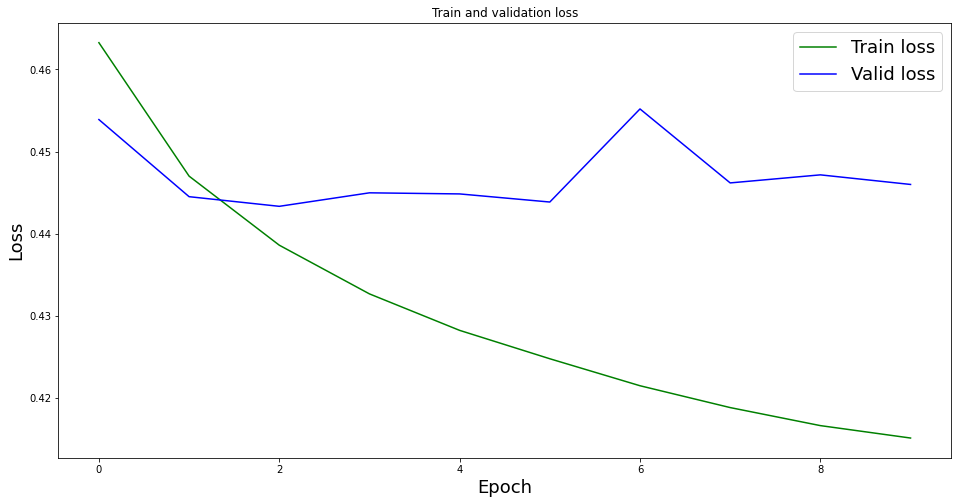

In [ ]:
# Visualize the training
plt.figure(figsize=(16,8))
plt.title('Train and validation loss')
plt.plot(train_loss_array, color = "green", label = "Train loss")
plt.plot(valid_loss_array, color = "blue", label = "Valid loss")
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend(fontsize=18)
plt.show()

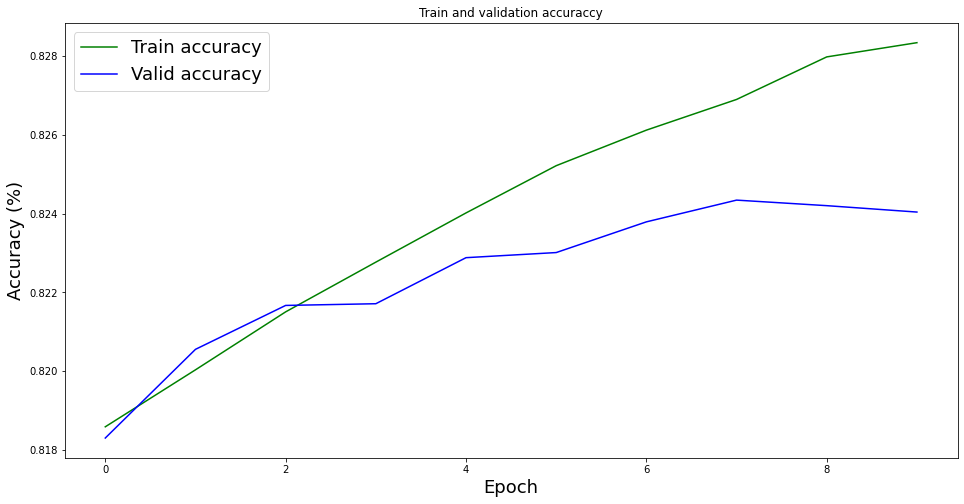

In [ ]:
# Visualize the training
plt.figure(figsize=(16,8))
plt.title('Train and validation accuraccy')
plt.plot(train_acc_array, color = "green", label = "Train accuracy")
plt.plot(valid_acc_array, color = "blue", label = "Valid accuracy")
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('Accuracy (%)',fontsize=18)
plt.legend(fontsize=18)
plt.show()

In [ ]:
model.load_state_dict(torch.load('drive/MyDrive/twitter_best-model.pt', map_location=torch.device('cpu')))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'-- Best model --')
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

model.load_state_dict(torch.load('drive/MyDrive/twitter_last-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'\n-- Last model --')
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

-- Best model --
Test Loss: 0.457 | Test Acc: 81.81%

-- Last model --
Test Loss: 0.457 | Test Acc: 81.81%


In [ ]:
model.load_state_dict(torch.load('drive/MyDrive/twitter_best-model.pt', map_location=torch.device('cpu')))

model.eval() # turn off drop out

predictions = []
labels = []

# Collect predictions and labels
for batch in test_iterator:
  text, text_lengths = batch.news

  predictions.append(model(text, text_lengths).squeeze(1))

  labels.append(batch.labels)

# Convert to numpy
pred_tensor = torch.cat(predictions).cpu()
labels_tensor = torch.cat(labels).cpu()

# Get the metrics
fpr, tpr, threshold = metrics.roc_curve(labels_tensor.detach().numpy(), pred_tensor.detach().numpy())
roc_auc = metrics.auc(fpr, tpr)

# Plot
plt.figure(figsize=(16,8))
plt.title('Receiver Operating Characteristic of the best model', fontsize = 18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right', fontsize = 18)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.show()

In [ ]:
model.load_state_dict(torch.load('drive/MyDrive/twitter_last-model.pt'))

model.eval() # turn off drop out

predictions = []
labels = []

# Collect predictions and labels
for batch in test_iterator:
  text, text_lengths = batch.news

  predictions.append(model(text, text_lengths).squeeze(1))

  labels.append(batch.labels)

# Convert to numpy
pred_tensor = torch.cat(predictions).cpu()
labels_tensor = torch.cat(labels).cpu()

# Get the metrics
fpr, tpr, threshold = metrics.roc_curve(labels_tensor.detach().numpy(), pred_tensor.detach().numpy())
roc_auc = metrics.auc(fpr, tpr)

# Plot
plt.figure(figsize=(16,8))
plt.title('Receiver Operating Characteristic of the last model', fontsize = 18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right', fontsize = 18)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.show()

MSFT

In [ ]:
# preprocess
df_preprocessed = tweets_preprocess(df_tweet_sorted_all[4]) # msft
print("preporcessed done")

preporcessed done


In [ ]:
df_preprocessed

,text,label
0,microsoft may call quits fitness wearables rea...,1
1,nvda nothing fear enviable position chinese co...,0
2,microsoft watch today xbox daily live e right ...,1
3,microsoft humdrum update surface pro upgraded ...,1
4,escalating quickly msft even joined selling cy...,0
...,...,...
321625,microsoft proves life windows read http owler ...,1
321626,frank brod chief accounting officer msft panel...,1
321627,cellphone hacker gateway gmail http dld bz ecp...,0
321628,god msft obnoxious,0


In [ ]:
!python -m spacy download en_core_web_sm

2021-04-14 19:01:08.150347: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 13.7MB 239kB/s 
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
#LSTM, ngram 1,3
# AAPL, MSFT may be the most interesting :)

# split them
INPUT_SIZE = len(df_preprocessed)
TRAIN_SIZE = int(TRAIN_SPLIT * INPUT_SIZE) 
VALID_SIZE = int(VALIDATION_SPLIT * TRAIN_SIZE)

df_train = df_preprocessed[:TRAIN_SIZE - VALID_SIZE] 
df_valid = df_preprocessed[TRAIN_SIZE - VALID_SIZE:TRAIN_SIZE] 
df_test = df_preprocessed[TRAIN_SIZE:]

# Save them without the indexes
df_train.to_csv('drive/MyDrive/df_train.tsv', sep = '\t', index=False)
df_valid.to_csv('drive/MyDrive/df_valid.tsv', sep = '\t', index=False)
df_test.to_csv('drive/MyDrive/df_test.tsv', sep = '\t', index=False)

print("split done")

# data structure
NEWS = data.Field(#tokenize = 'spacy', -> gave errors for some reason, may investigate it depend of the results
                  preprocessing = generate_ngrams,
                  #tokenizer_language = 'en_core_web_sm',
                  include_lengths = True)

LABELS = data.LabelField(dtype = torch.float)

fields = [('news', NEWS), ('labels', LABELS)]

# load the data
train_data, valid_data, test_data = data.TabularDataset.splits(
                                        path = "drive/MyDrive",
                                        train = "df_train.tsv",
                                        validation = "df_valid.tsv",
                                        test = "df_test.tsv",
                                        format = "tsv",
                                        fields = fields,
                                        skip_header = True
)

MAX_VOCAB_SIZE = 20000

# create vocab
NEWS.build_vocab(train_data,
                  max_size = MAX_VOCAB_SIZE)

LABELS.build_vocab(train_data)

print(f"Unique tokens in TEXT vocabulary: {len(NEWS.vocab)}")
print(f"Unique tokens in LABEL vocabulary: {len(LABELS.vocab)}")

print(NEWS.vocab.freqs.most_common(20))
print(LABELS.vocab.stoi)

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Show it
print(device)

#Set the iterators for the data
BATCH_SIZE = 64
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    sort_key = lambda x: x.news, #sort by n attribute (quote)
    batch_size = BATCH_SIZE,
    sort_within_batch = True,
    device = device)

print('Train:')
for batch in train_iterator:
    print(batch)
    break
    
print('Valid:')
for batch in valid_iterator:
    print(batch)
    break
    
print('Test:')
for batch in test_iterator:
    print(batch)
    break

split done
Unique tokens in TEXT vocabulary: 20002
Unique tokens in LABEL vocabulary: 2
[('msft', 215683), ('http', 109926), ('microsoft', 92777), ('com', 57990), ('us', 56118), ('read', 54514), ('owler', 52839), ('owler us', 49776), ('http owler', 49776), ('http owler us', 49776), ('read http', 49726), ('read http owler', 49662), ('aapl', 49326), ('amzn', 35852), ('fb', 34365), ('https', 27421), ('goog', 25166), ('googl', 19030), ('stocks', 17660), ('nflx', 17161)]
defaultdict(None, {'1': 0, '0': 1})
cuda
Train:

[torchtext.data.batch.Batch of size 64]
	[.news]:('[torch.cuda.LongTensor of size 106x64 (GPU 0)]', '[torch.cuda.LongTensor of size 64 (GPU 0)]')
	[.labels]:[torch.cuda.FloatTensor of size 64 (GPU 0)]
Valid:

[torchtext.data.batch.Batch of size 64]
	[.news]:('[torch.cuda.LongTensor of size 55x64 (GPU 0)]', '[torch.cuda.LongTensor of size 64 (GPU 0)]')
	[.labels]:[torch.cuda.FloatTensor of size 64 (GPU 0)]
Test:

[torchtext.data.batch.Batch of size 64]
	[.news]:('[torch.cuda.L

In [ ]:
INPUT_DIM = len(NEWS.vocab)
PAD_IDX = NEWS.vocab.stoi[NEWS.pad_token]

N_LAYERS = 4
BIDIRECTIONAL = True
DROPOUT = 0.25
EMBEDDING_DIM = 100
HIDDEN_DIM = 128
OUTPUT_DIM = 1

model = RNN(INPUT_DIM, 
            EMBEDDING_DIM, 
            HIDDEN_DIM, 
            OUTPUT_DIM, 
            N_LAYERS, 
            BIDIRECTIONAL, 
            DROPOUT, 
            PAD_IDX)

In [ ]:
print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 3,421,769 trainable parameters


In [ ]:
UNK_IDX = NEWS.vocab.stoi[NEWS.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

print(model.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.2505, -0.2264,  0.3193,  ..., -0.4501, -1.0455, -0.1136],
        ...,
        [ 0.5309,  1.0190,  0.1194,  ..., -0.3015, -0.5959,  1.7015],
        [ 1.6071,  0.3652, -0.6013,  ..., -0.2879, -0.1533, -0.8359],
        [ 0.2154,  0.2673,  1.8430,  ...,  1.1325, -0.7889, -0.6508]])


In [ ]:
weights = torch.nonzero(model.embedding.weight.data, as_tuple = True)[0]

print(torch.unique(weights).shape)
print(MAX_VOCAB_SIZE)

assert list(torch.unique(weights).shape)[0] == MAX_VOCAB_SIZE

torch.Size([20000])
20000


In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()

model = model.to(device)
criterion = criterion.to(device)

In [ ]:
import time
best_valid_loss = float('inf')

no_improve_counter = 0
last_valid_acc = 0

train_loss_array = []
train_acc_array = []
valid_loss_array = []
valid_acc_array = []

N_EPOCHS = 10

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

    train_loss_array.append(train_loss)
    train_acc_array.append(train_acc)
    valid_loss_array.append(valid_loss)
    valid_acc_array.append(valid_acc)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'drive/MyDrive/twitter_best-model.pt')

    # early leave
    no_improvements = ""

    if last_valid_acc > valid_acc:
        best_valid_loss = valid_loss
        no_improve_counter = no_improve_counter + 1
        no_improvements = "| There were no improvements on the validation set!"
    else:
        no_improve_counter = 0

    last_valid_acc = valid_acc

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s {no_improvements}')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

    if no_improve_counter is 5:
      print(f'The model is not improving, going to stop.')
      break

    if train_acc > 0.95:
      print(f'The model training is finished.')
      break 

torch.save(model.state_dict(), 'drive/MyDrive/twitter_last-model.pt')      

Epoch: 01 | Epoch Time: 16m 56s 
	Train Loss: 0.511 | Train Acc: 78.65%
	 Val. Loss: 0.509 |  Val. Acc: 78.40%
Epoch: 02 | Epoch Time: 16m 18s 
	Train Loss: 0.498 | Train Acc: 78.85%
	 Val. Loss: 0.494 |  Val. Acc: 78.86%
Epoch: 03 | Epoch Time: 16m 23s 
	Train Loss: 0.481 | Train Acc: 79.29%
	 Val. Loss: 0.488 |  Val. Acc: 79.06%
Epoch: 04 | Epoch Time: 16m 24s | There were no improvements on the validation set!
	Train Loss: 0.468 | Train Acc: 79.67%
	 Val. Loss: 0.488 |  Val. Acc: 79.04%
Epoch: 05 | Epoch Time: 16m 33s 
	Train Loss: 0.458 | Train Acc: 79.99%
	 Val. Loss: 0.486 |  Val. Acc: 79.30%
Epoch: 06 | Epoch Time: 16m 4s 
	Train Loss: 0.448 | Train Acc: 80.39%
	 Val. Loss: 0.496 |  Val. Acc: 79.41%
Epoch: 07 | Epoch Time: 16m 18s | There were no improvements on the validation set!
	Train Loss: 0.439 | Train Acc: 80.73%
	 Val. Loss: 0.504 |  Val. Acc: 78.84%
Epoch: 08 | Epoch Time: 16m 23s | There were no improvements on the validation set!
	Train Loss: 0.430 | Train Acc: 81.20%

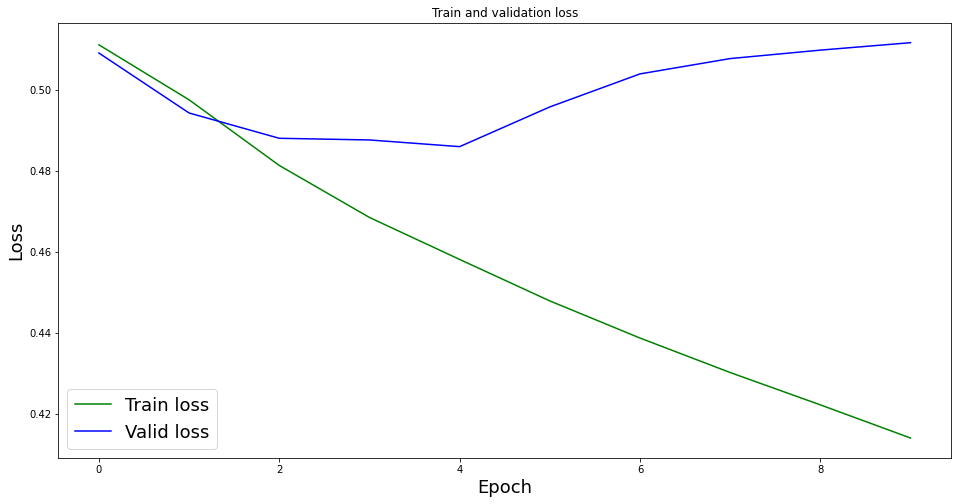

In [ ]:
# Visualize the training
plt.figure(figsize=(16,8))
plt.title('Train and validation loss')
plt.plot(train_loss_array, color = "green", label = "Train loss")
plt.plot(valid_loss_array, color = "blue", label = "Valid loss")
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('Loss',fontsize=18)
plt.legend(fontsize=18)
plt.show()

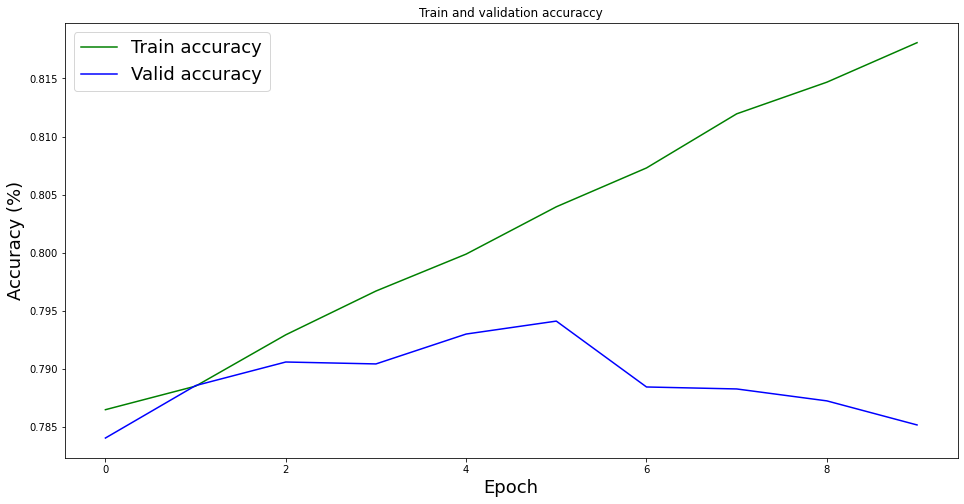

In [ ]:
# Visualize the training
plt.figure(figsize=(16,8))
plt.title('Train and validation accuraccy')
plt.plot(train_acc_array, color = "green", label = "Train accuracy")
plt.plot(valid_acc_array, color = "blue", label = "Valid accuracy")
plt.xlabel('Epoch',fontsize=18)
plt.ylabel('Accuracy (%)',fontsize=18)
plt.legend(fontsize=18)
plt.show()

In [ ]:
model.load_state_dict(torch.load('drive/MyDrive/twitter_best-model.pt', map_location=torch.device('cpu')))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'-- Best model --')
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

model.load_state_dict(torch.load('drive/MyDrive/twitter_last-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'\n-- Last model --')
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

-- Best model --
Test Loss: 0.491 | Test Acc: 79.23%

-- Last model --
Test Loss: 0.516 | Test Acc: 78.47%


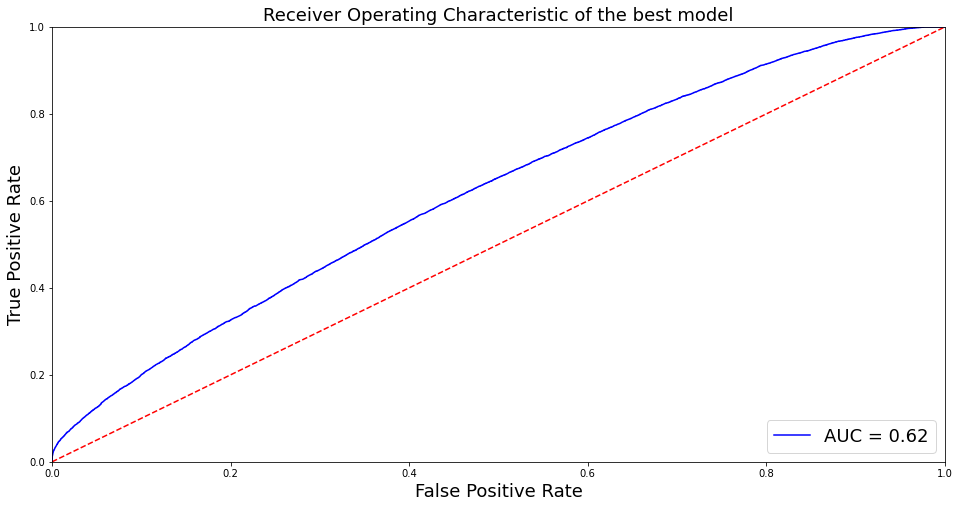

In [ ]:
model.load_state_dict(torch.load('drive/MyDrive/twitter_best-model.pt'))

model.eval() # turn off drop out

predictions = []
labels = []

# Collect predictions and labels
for batch in test_iterator:
  text, text_lengths = batch.news

  predictions.append(model(text, text_lengths).squeeze(1))

  labels.append(batch.labels)

# Convert to numpy
pred_tensor = torch.cat(predictions).cpu()
labels_tensor = torch.cat(labels).cpu()

# Get the metrics
fpr, tpr, threshold = metrics.roc_curve(labels_tensor.detach().numpy(), pred_tensor.detach().numpy())
roc_auc = metrics.auc(fpr, tpr)

# Plot
plt.figure(figsize=(16,8))
plt.title('Receiver Operating Characteristic of the best model', fontsize = 18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right', fontsize = 18)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.show()

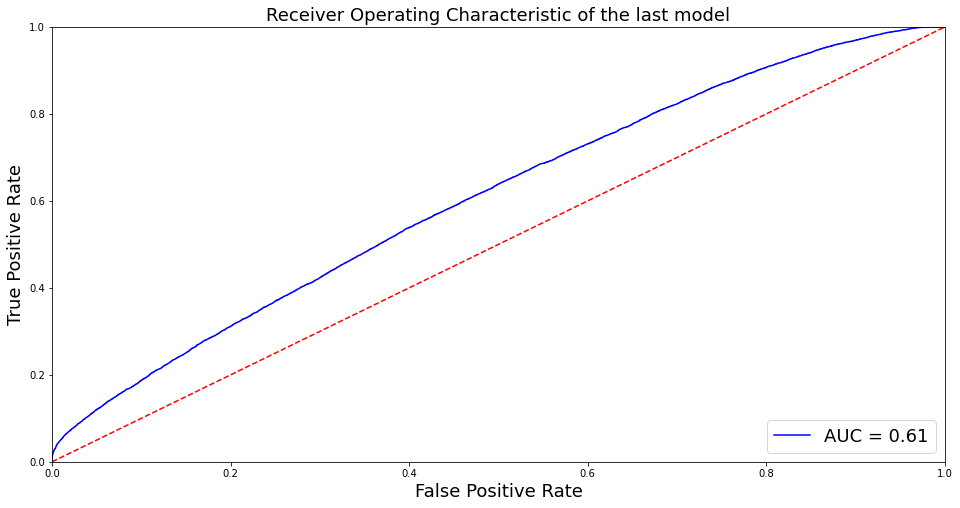

In [ ]:
model.load_state_dict(torch.load('drive/MyDrive/twitter_last-model.pt'))

model.eval() # turn off drop out

predictions = []
labels = []

# Collect predictions and labels
for batch in test_iterator:
  text, text_lengths = batch.news

  predictions.append(model(text, text_lengths).squeeze(1))

  labels.append(batch.labels)

# Convert to numpy
pred_tensor = torch.cat(predictions).cpu()
labels_tensor = torch.cat(labels).cpu()

# Get the metrics
fpr, tpr, threshold = metrics.roc_curve(labels_tensor.detach().numpy(), pred_tensor.detach().numpy())
roc_auc = metrics.auc(fpr, tpr)

# Plot
plt.figure(figsize=(16,8))
plt.title('Receiver Operating Characteristic of the last model', fontsize = 18)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right', fontsize = 18)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', fontsize = 18)
plt.xlabel('False Positive Rate', fontsize = 18)
plt.show()